In [3]:
from pydub import AudioSegment
from IPython import display
from tqdm import tqdm

In [160]:
def listtofile(lijst, bestandsnaam):
    with open(bestandsnaam, 'w') as f:
        first = True
        for ding in lijst:
            if not first:
                f.write("\n")
            else:
                first = False
            f.write(f"{ding}")

In [163]:
import os
audios = []
for file in os.listdir("data/downloaded"):
    if file.endswith(".wav"):
        audios.append(file[:-4])

listtofile(audios,"data/audios")

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# from pydub import silence, effects, exceptions

# def stereodiff(sound):
#     sound_channels = sound.split_to_mono()
#     c1 = sound_channels[0]
#     c2 = sound_channels[1]
#     a1 = c1.get_array_of_samples()
#     a2 = c2.get_array_of_samples()
#     diff = np.array(a1) - np.array(a2)
#     sum = np.array(a1) + np.array(a2)
#     return (diff, sum)

# def stereodifferent(sound):
#     (diff, sum) = stereodiff(sound)
#     diff_anders = bool(np.any(diff))
#     sum_anders = bool(np.any(sum))
#     return (diff_anders and sum_anders)

In [121]:
import matplotlib.pyplot as plt
import numpy as np
from pydub import silence, effects, exceptions
import array

def stereodiff(sound):
    sound_channels = sound.split_to_mono()
    c1 = sound_channels[0]
    c2 = sound_channels[1]
    a1 = c1.get_array_of_samples()
    a2 = c2.get_array_of_samples()
    rate = c1.frame_rate
    diff = np.array(a1) - np.array(a2)
    return diff

def stereodifferent(sound):
    diff = stereodiff(sound)
    return bool(np.any(diff))

def stereoreallydifferent(sound):
    diff = stereodiff(sound)
    chan = sound.split_to_mono()[0]
    diffaudio = chan._spawn(array.array(chan.array_type, diff))
    return diffaudio.dBFS >= -55
    



In [123]:
truestereos = []
soortvanstereos = []
for ding in tqdm(dingens):
    try:
        sound = AudioSegment.from_file("data/downloaded/" + ding)
        if sound.channels != 2:
            2
            #if sound.channels != 1:
            #    print(f"{ding} heeft {sound.channels} channels")
        elif stereodifferent(sound):
            #print(ding)
            if stereoreallydifferent(sound):
                truestereos.append(ding)
            else:
                soortvanstereos.append(ding)
    except exceptions.CouldntDecodeError:
        print("Couldn't decode: " + ding)
        
len(truestereos)

 89%|████████▊ | 2019/2280 [08:19<00:55,  4.73it/s]

Couldn't decode: 806787.wav


100%|██████████| 2280/2280 [09:55<00:00,  3.83it/s]


1514

In [128]:
import matplotlib.pyplot as plt
import numpy as np
from pydub import silence, effects
from IPython.display import display
import array

stereo = truestereos[0]
sound = AudioSegment.from_file("data/downloaded/" + stereo)
print(stereodifferent(sound))
mono = [ding for ding in dingens if ding not in truestereos][0]
sound = AudioSegment.from_file("data/downloaded/" + mono)
print(stereodifferent(sound))

i = -1

True
True


254
10955
10.95498866213152


max_dBFS: -2.649217459905164
diff dBFS: -inf
diff dBFS: -inf


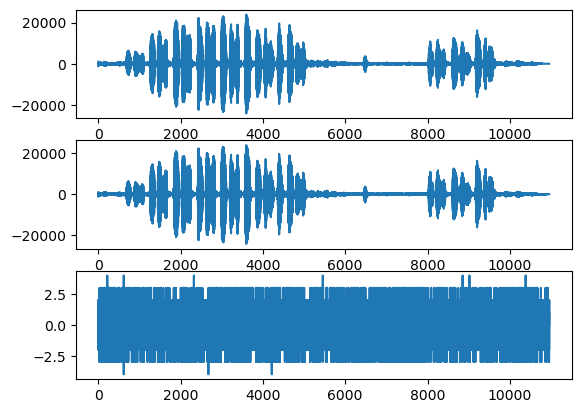

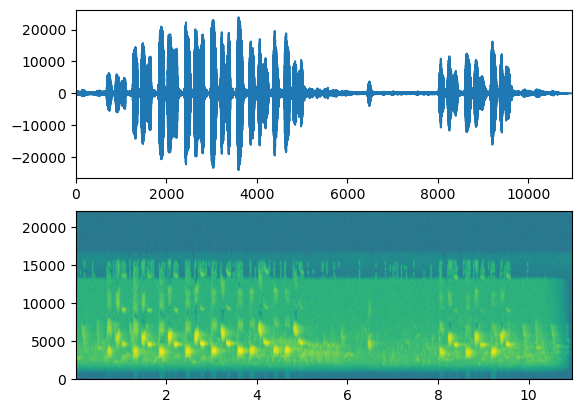

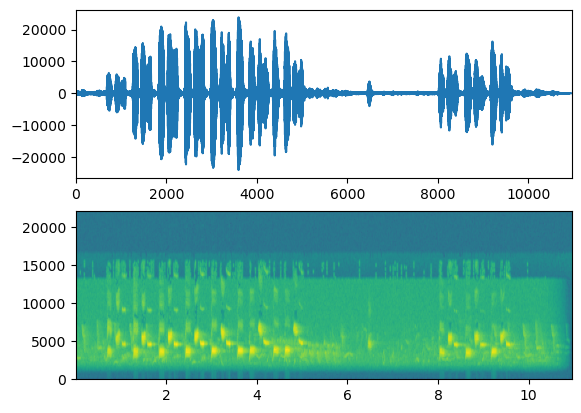

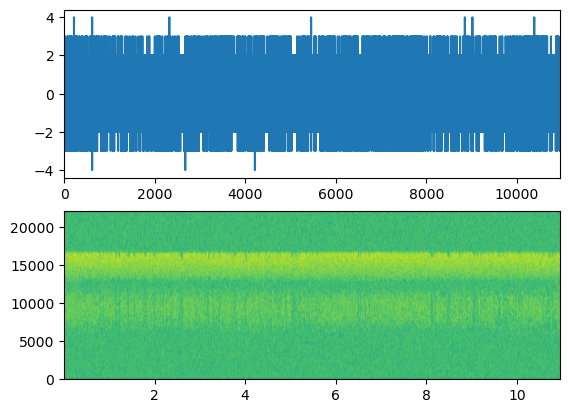

In [145]:
i += 1
stereo = truestereos[i]
stereo = soortvanstereos[i]
print(len(soortvanstereos))

sound = AudioSegment.from_file("data/downloaded/" + stereo)
sound_channels = sound.split_to_mono()

print(len(sound))
print(sound.duration_seconds)

c1 = sound_channels[0]
c2 = sound_channels[1]
a1 = c1.get_array_of_samples()
a2 = c2.get_array_of_samples()
rate = c1.frame_rate
time = np.linspace(0, len(a1) / rate * 1000, num=len(a1))
diff = np.array(a1) - np.array(a2)
#diff = np.array(a1) + np.array(a2)

plt.figure()
plt.subplot(311).plot(time, a1)
#plt.subplot(312).set_xlim(0, len(a1) / rate * 1000)
plt.subplot(312).plot(time, a2)
plt.subplot(313).plot(time, diff)
plt.plot()
diff
a1 == a2
display(sound)
display(c1)
display(c2)

plt.figure()
plt.subplot(211).plot(time, a1)
plt.subplot(211).set_xlim(0, len(a1) / rate * 1000)
plt.subplot(212).specgram(a1, Fs=rate)
plt.plot()

plt.figure()
plt.subplot(211).plot(time, a2)
plt.subplot(211).set_xlim(0, len(a2) / rate * 1000)
plt.subplot(212).specgram(a2, Fs=rate)
plt.plot()

plt.figure()
plt.subplot(211).plot(time, diff)
plt.subplot(211).set_xlim(0, len(diff) / rate * 1000)
plt.subplot(212).specgram(diff, Fs=rate)
plt.plot()

diffaudio = c1._spawn(array.array(c1.array_type, diff))
print(f"max_dBFS: {sound.max_dBFS}")
print(f"diff dBFS: {diffaudio.dBFS}")
print(f"diff dBFS: {diffaudio.dBFS}")
#print(diffaudio.rms)
diffaudio

In [9]:
import array
sound_channels = sound.split_to_mono()
print(np.array_equal(np.array(sound_channels[0].get_array_of_samples()),
                     np.array(sound_channels[1].get_array_of_samples())))

print(np.nonzero(np.array(sound_channels[0].get_array_of_samples()) - 
                     np.array(sound_channels[1].get_array_of_samples())))

print("***")
print(sound.channels)
print(sound_channels[0].channels)
print(sound_channels[1].channels)
print(len(sound_channels[0]))
print(len(sound_channels[1]))
c1 = sound_channels[0].get_array_of_samples()
print(len(c1))
a1 = np.array(c1)
print("***")
print(len(a1))
a1 *= -1
print(len(a1))
c1 = array.array((sound_channels[0]).array_type, a1)
print("***")
print(len(c1))

print(sound_channels[0].get_array_of_samples() == sound_channels[1].get_array_of_samples())

sound_channels[0] = (sound_channels[0])._spawn(c1)
print(sound_channels[0].channels)
print(len(sound_channels[0]))
print(len(sound_channels[1]))

sound2 = AudioSegment.from_mono_audiosegments(sound_channels[0], sound_channels[1])
stereodifferent(sound)
stereodifferent(sound2)

False
(array([    882,     911,     921, ..., 1716253, 1716262, 1716265],
      shape=(1546295,)),)
***
2
1
1
35784
35784
1717632
***
1717632
1717632
***
1717632
False
1
35784
35784


True

In [ ]:
from pydub import silence, effects

print(len(sound))
print(sound.max_dBFS)
sound2 = effects.normalize(sound)
print(sound2.max_dBFS)
print(silence.detect_silence(sound, silence_thresh=-40))
print(silence.detect_nonsilent(sound, silence_thresh=-33))

0 137
1220 1858
4116 4740
6628 6928
8974 10049
11224 12814


[]

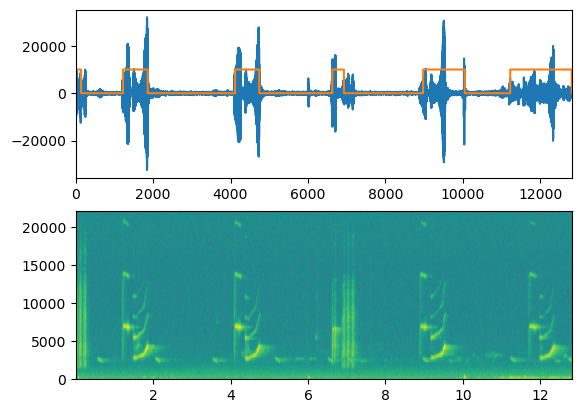

In [8]:
import matplotlib.pyplot as plt
import numpy as np
c1 = sound_channels[0]
c1 = effects.normalize(c1)
a1 = c1.get_array_of_samples()
rate = c1.frame_rate
time = np.linspace(0, len(a1) / rate * 1000, num=len(a1))

geluiden = silence.detect_nonsilent(c1, silence_thresh=-33, seek_step=1)
tijdgeluid = np.zeros(len(a1))
for [l,r] in geluiden:
    print(l,r)
    l = int(l * rate / 1000.0)
    r = int(r * rate / 1000.0)
    tijdgeluid[l:r] = 10000

plt.subplot(211).plot(time, a1, time, tijdgeluid)
plt.subplot(211).set_xlim(0, len(a1) / rate * 1000)
plt.subplot(212).specgram(a1, Fs=rate)
plt.plot()

In [ ]:
from pydub import playback

from IPython.display import display

display(c1)

ds = silence.split_on_silence(c1, silence_thresh=-33, keep_silence=200)
for d in ds:
    display(d)


In [ ]:
type(sound.raw_data)
sound.array_type